In [210]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [211]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("car_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [212]:

# Chia CarName thành brand và model


df = df.drop(columns=['car_ID'])

# Cột dữ liệu phân loại
categorical_column = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarName'] 

# Cột dữ liệu liên tục
numerical_column = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

# Mã hóa dữ liệu phân loại
df = pd.get_dummies(df, columns=categorical_column, drop_first=True)

# Tách biến độc lập (X) và biến phụ thuộc (y)
X = df.drop('price', axis=1).astype(float)
y = df['price'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

# Thêm cột hằng số vào X_train và X_test
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))
Xbar_train = np.concatenate((ones_train, X_train), axis=1)
Xbar_test = np.concatenate((ones_test, X_test), axis=1)


A = np.dot(Xbar_train.T, Xbar_train)
b = np.dot(Xbar_train.T, y_train)
w = np.dot(np.linalg.pinv(A), b)

# Dự đoán trên tập kiểm tra
y_pred = np.dot(Xbar_test, w)

# Tạo DataFrame để so sánh
pred_df = pd.DataFrame({'Giá trị thực tế': y_test, 'Giá trị dự đoán': y_pred, 'Sai lệch': y_test - y_pred})

print(pred_df)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

    Giá trị thực tế  Giá trị dự đoán      Sai lệch
0         30760.000     29739.106818   1020.893182
1         17859.167     21868.922547  -4009.755547
2          9549.000     11144.608894  -1595.608894
3         11850.000     12423.060724   -573.060724
4         28248.000     30334.387760  -2086.387760
5          7799.000      6895.146960    903.853040
6          7788.000      7618.504390    169.495610
7          9258.000      7229.989808   2028.010192
8         10198.000      9613.513825    584.486175
9          7775.000      7365.255953    409.744047
10        13295.000     13034.021339    260.978661
11         8238.000      6128.844860   2109.155140
12        18280.000     15819.294296   2460.705704
13         9988.000      9729.210177    258.789823
14        40960.000     43128.203406  -2168.203406
15         6488.000      6344.838447    143.161553
16         5151.000       659.255591   4491.744409
17        12629.000     13626.728013   -997.728013
18         8189.000      9033.6

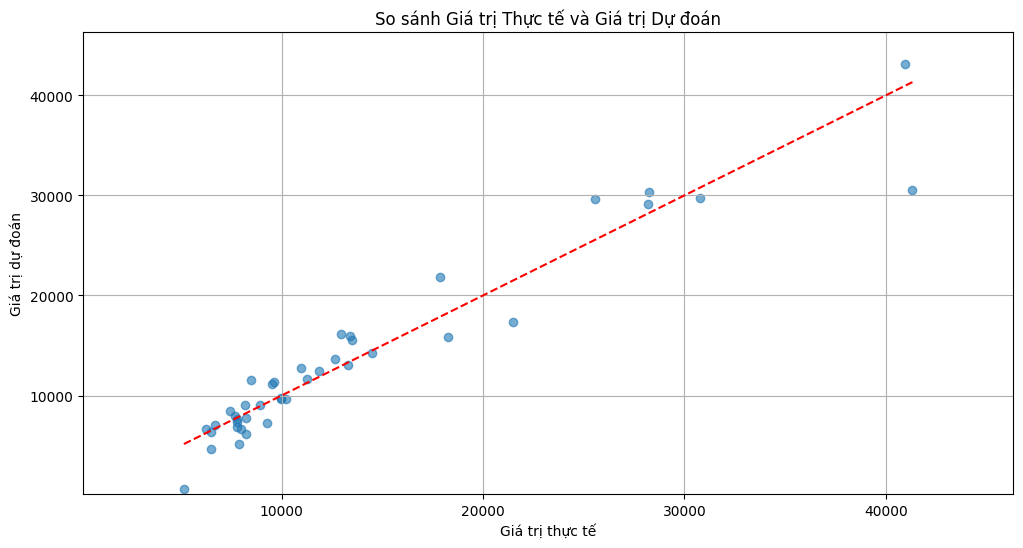

In [213]:
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường chuẩn
plt.title('So sánh Giá trị Thực tế và Giá trị Dự đoán')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.grid()
plt.xlim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục x
plt.ylim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục y
plt.show()